In [1]:
import numpy as np
import bima
from matplotlib import pyplot as plt
from bima import Config, Body

In [2]:
arr = np.array([[1, -1, 0, 0, 0, -1, 0], [2, 0.5, 0, 0, 0, 0.5, 0]])
initial = bima.Initial.from_arr(arr)
print(initial)

[Initial(m=1.000000000, r=(-1.000000000, 0.000000000, 0.000000000), v=(0.000000000, -1.000000000, 0.000000000)), Initial(m=2.000000000, r=(0.500000000, 0.000000000, 0.000000000), v=(0.000000000, 0.500000000, 0.000000000))]


In [3]:
def plot_bodies(bodies: list[Body]):
  fig, ax = plt.subplots()
  for body in bodies:
    length = len(body)
    sample_n = np.min([1000, length])
    skip = length//sample_n
    x = body.x[::skip]
    y = body.y[::skip]

    ax.plot(x, y)
    ax.scatter(x[-1], y[-1])
  ax.set_aspect("equal")
  fig.show()

# Euler

In [4]:
t_stop = 8.1
h = t_stop / 1000
config = Config(
    force=bima.ForceMethod.Direct,
    integrator=bima.Integrator.Euler,
    timestep=bima.TimestepMethod.Constant(h),
    close_encounter=bima.CloseEncounterMethod.Regularized
)

sim = bima.Simulation(initial)

bodies = sim.in_memory.run(config, t_stop*10)

[##################################################] 100.00% (10002) [277833 it/s]


/tmp/ipykernel_393882/2423828485.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


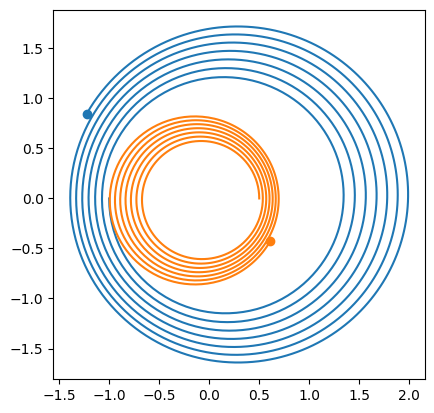

In [5]:
plot_bodies(bodies)

[##################################################] 100.00% (10001) [2500250 it/s]


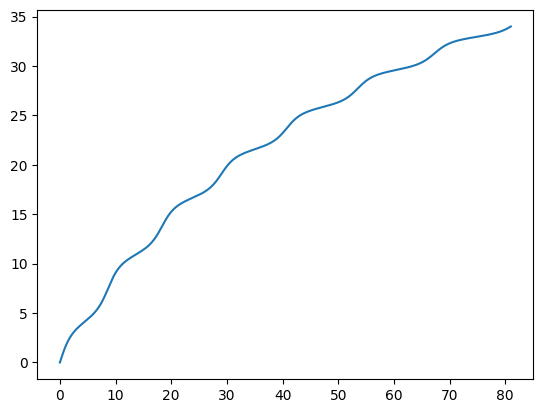

In [7]:
energy = bima.Energy.from_bodies(bodies)
e0 = energy.e[0]
plt.plot(energy.t, (e0-energy.e)/e0*100)

# RK4

In [8]:
t_stop = 8.1
h = t_stop / 1000
config = Config(
    force=bima.ForceMethod.Direct,
    integrator=bima.Integrator.RK4,
    timestep=bima.TimestepMethod.Constant(h),
    close_encounter=bima.CloseEncounterMethod.Regularized
)

sim = bima.Simulation(initial)

bodies = sim.in_memory.run(config, t_stop*10)

[##################################################] 100.00% (10002) [357214 it/s]


/tmp/ipykernel_393882/2423828485.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


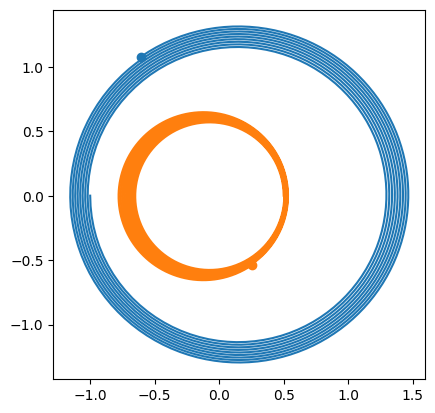

In [9]:
plot_bodies(bodies)

[##################################################] 100.00% (10001) [3333666 it/s]


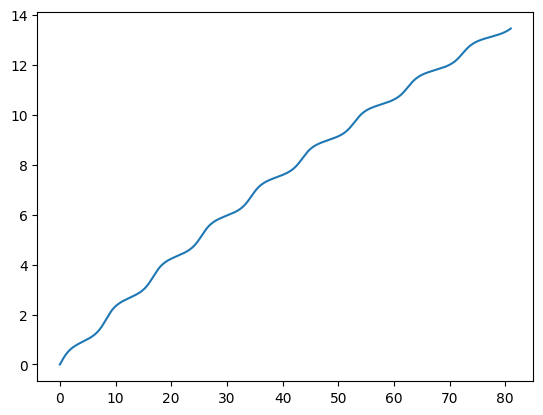

In [10]:
energy = bima.Energy.from_bodies(bodies)
e0 = energy.e[0]
plt.plot(energy.t, np.abs(1-energy.e/e0)*100)

# Bulirsch-Stoer

In [15]:
t_stop = 8.1
h = t_stop / 1000
config = Config(
    force=bima.ForceMethod.Direct,
    integrator=bima.Integrator.BS,
    timestep=bima.TimestepMethod.Constant(h),
    close_encounter=bima.CloseEncounterMethod.Regularized
)

sim = bima.Simulation(initial)

bodies = sim.in_memory.run(config, t_stop*10)

[##################################################] 100.00% (10002) [138916 it/s]


/tmp/ipykernel_393882/2423828485.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


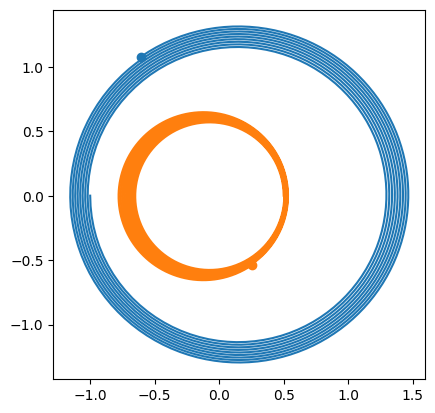

In [16]:
plot_bodies(bodies)

[##################################################] 100.00% (10001) [3333666 it/s]


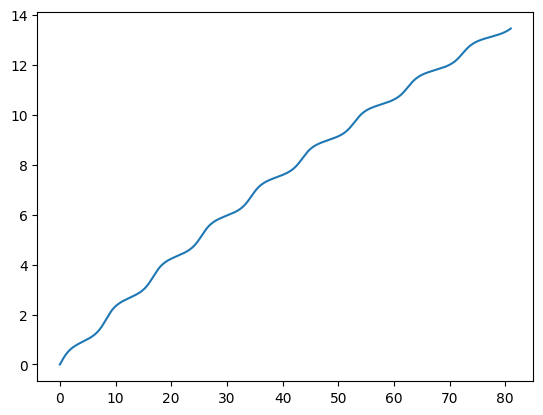

In [ ]:
energy = bima.Energy.from_bodies(bodies)
e0 = energy.e[0]
plt.plot(energy.t, np.abs(1-energy.e/e0)*100)

# Symplectic

## Leapfrog

In [18]:
t_stop = 8.1
h = t_stop / 1000
config = Config(
    force=bima.ForceMethod.Direct,
    integrator=bima.Integrator.LeapFrog,
    timestep=bima.TimestepMethod.Constant(h),
    close_encounter=bima.CloseEncounterMethod.Regularized
)

sim = bima.Simulation(initial)

bodies = sim.in_memory.run(config, t_stop*10)

[##################################################] 100.00% (30003) [1071535 it/s]


/tmp/ipykernel_393882/2423828485.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


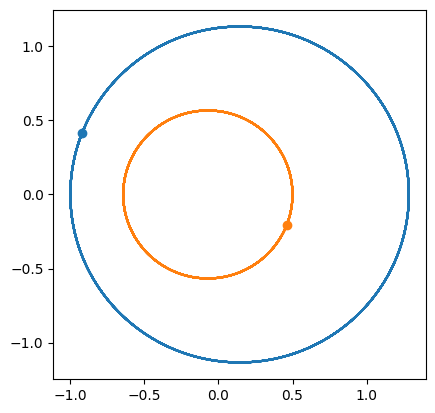

In [19]:
plot_bodies(bodies)

[##################################################] 100.00% (10001) [2500250 it/s]


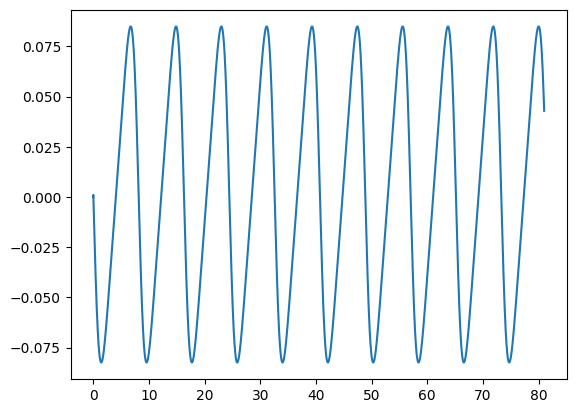

In [21]:
energy = bima.Energy.from_bodies(bodies)
e0 = energy.e[0]
plt.plot(energy.t, (1-energy.e/e0)*100)

## WH